In [9]:
import sys  
import seaborn as sns
from matplotlib import pyplot as plt
from pyimzml.ImzMLParser import ImzMLParser
sys.path.insert(0, "/sise/assafzar-group/assafzar/Leor")
from NanoBiopsy.normalization.normalizer_factory import NormalizerFactory
from NanoBiopsy.binning.binning_factory import BinningFactory

%matplotlib inline

In [23]:
# set path to msi file
msi_p = "/sise/assafzar-group/assafzar/Leor/DHG/Original/HG 12-11-r.imzML"

In [11]:
# create normalizer object
normalizer = NormalizerFactory().get_normalizer('TIC')
# create binning object
binning = MassResolutionBinning(49, 1201, 0.025)

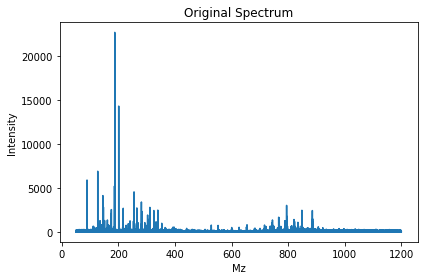

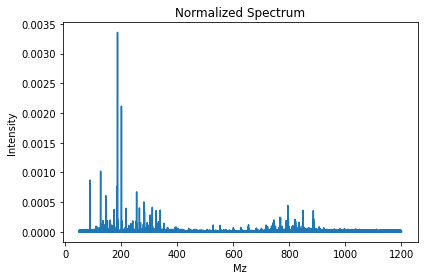

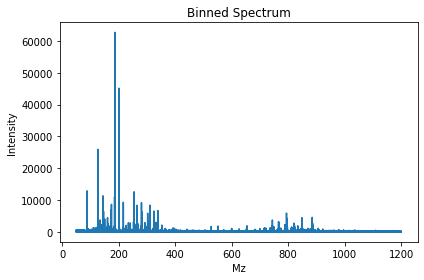

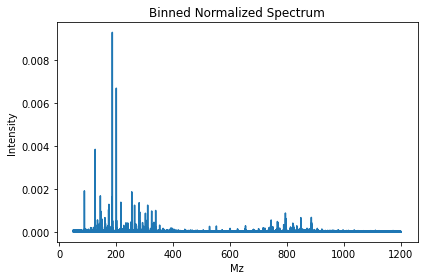

In [43]:
# parse imzML file
with ImzMLParser(msi_p) as p:
  # get single spectrum
  original_mzs, original_intensities = p.getspectrum(2999)

  # normalize spectrum
  normalized_mzs, normalize_intensities = normalizer.normalize(
      (original_mzs, original_intensities))

  #  bin spectrum
  binned_mzs, binned_intensities = binning.bin(
      (original_mzs, original_intensities))

  # normalize and bin spectrum
  binned_normalized_mzs, binned_normalized_intensities = binning.bin(
    normalizer.normalize((original_mzs, original_intensities)))

  # Plot raw spectra
  plt.plot(original_mzs, original_intensities)
  plt.xlabel('Mz')
  plt.ylabel('Intensity')
  plt.title('Raw spectra')
  plt.tight_layout()
  plt.show()

  # Plot normalized spectra
  plt.plot(normalized_mzs, normalize_intensities)
  plt.xlabel('Mz')
  plt.ylabel('Intensity')
  plt.title('Normalized spectra')
  plt.tight_layout()
  plt.show()

  # Plot binned spectra
  plt.plot(binned_mzs, binned_intensities)
  plt.xlabel('Mz')
  plt.ylabel('Intensity')
  plt.title('Binned spectra')
  plt.tight_layout()
  plt.show()

  # Plot binned + normalized spectra
  plt.plot(binned_normalized_mzs, binned_normalized_intensities)
  plt.xlabel('Mz')
  plt.ylabel('Intensity')
  plt.title('Binned Normalized spectra')
  plt.tight_layout()
  plt.show()